# Clasificación de flores


El caso de uso va a ser generara un modelo convolucional para clasificar los 5 tipos de flores distintos que usa la competitición :     

*   Daisy
*   Dandelion
*   Rose
*   sunflower
*   tulip


Este conjunto de datos pertenece al Desafío de Datos DPhi #25: Reconocimiento de Flores. El conjunto de datos contiene imágenes en formato JPEG de cinco tipos de flores.

daisy (margarita)
dandelion (diente de león)
rose (rosa)
sunflower (girasol)
tulip (tulipán)

Contenido:
train: contiene todas las imágenes que se utilizarán para entrenar tu modelo. En esta carpeta encontrarás cinco subcarpetas llamadas 'daisy', 'dandelion', 'rose', 'sunflower' y 'tulip', que contienen las imágenes de las respectivas flores.
test: contiene 924 imágenes de flores. Para estas imágenes, debes hacer predicciones con los nombres de las respectivas flores: 'daisy', 'dandelion', 'rose', 'sunflower' y 'tulip'.
Testing_set_flower.csv: este archivo indica el orden de las predicciones para cada imagen que se debe enviar en la plataforma. Asegúrate de que las predicciones que descargues estén en el mismo orden que se indica en este archivo, junto con el nombre de archivo de cada imagen.
sample_submission: este es un archivo CSV que contiene una muestra de envío para el desafío de datos.

Reconocimientos:
Todas las imágenes proporcionadas en este desafío de datos están bajo la Licencia de Atribución de Creative Commons. Los fotógrafos están enumerados en el archivo LICENSE.txt.



# Descarga de ficheros

Monto mi drive en el gestor de ficheros de google colab.

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


Luego las descomprimo para poder leerlas con los siguientes métodos

In [ ]:
import cv2
import os
import numpy as np 
import keras
import matplotlib.pyplot as plt
import glob

# Descomprimimos las carpetas 
!unzip /content/mydrive/MyDrive/BIG_DATA_Y_IA/proIA/flowers/train.zip
!unzip /content/mydrive/MyDrive/BIG_DATA_Y_IA/proIA/flowers/test.zip

Archive:  /content/mydrive/MyDrive/BIG_DATA_Y_IA/proIA/flowers/train.zip
   creating: train/daisy/
  inflating: train/daisy/10140303196_b88d3d6cec.jpg  
  inflating: train/daisy/10172379554_b296050f82_n.jpg  
  inflating: train/daisy/10172567486_2748826a8b.jpg  
  inflating: train/daisy/10172636503_21bededa75_n.jpg  
  inflating: train/daisy/10391248763_1d16681106_n.jpg  
  inflating: train/daisy/10437754174_22ec990b77_m.jpg  
  inflating: train/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: train/daisy/10437929963_bc13eebe0c.jpg  
  inflating: train/daisy/10466290366_cc72e33532.jpg  
  inflating: train/daisy/10466558316_a7198b87e2.jpg  
  inflating: train/daisy/10555749515_13a12a026e.jpg  
  inflating: train/daisy/10555815624_dc211569b0.jpg  
  inflating: train/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: train/daisy/10559679065_50d2b16f6d.jpg  
  inflating: train/daisy/10712722853_5632165b04.jpg  
  inflating: train/daisy/10770585085_4742b9dac3_n.jpg  
  inflating: train/dais

Creamos variable con las dimensiones de las imágenes y un diccionario con los valores y_test posibles:

*   daisy
*   dandelion
*   rose
*   sunflower
*   tulip



In [ ]:
MAP_CHARACTERS = {
    0: 'daisy', 1: 'dandelion', 2: 'rose',
    3: 'sunflower', 4: 'tulip'
    }

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

# Métodos para la carga de datasets

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    for filename in glob.glob(dirname + '/*.*'):
        image = cv2.imread(filename)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        X_test.append(image)
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test)


# Lectura de los datos de train y de test

Leemos las imágenes de las carpetas creadas después de descomprimirlas.

In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/content/train"
DATASET_TEST_PATH_COLAB = "/content/test"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t = load_test_set(DATASET_TEST_PATH_COLAB)


Leyendo 501 imágenes encontradas de daisy
Leyendo 646 imágenes encontradas de dandelion
Leyendo 497 imágenes encontradas de rose
Leyendo 495 imágenes encontradas de sunflower
Leyendo 607 imágenes encontradas de tulip
Leídas 924 imágenes de test


# Visualización

Genero un método para visualizar la imagen y ver que se han leído correctamente.

In [ ]:
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  plt.colorbar()
  plt.grid(False)
  plt.show()

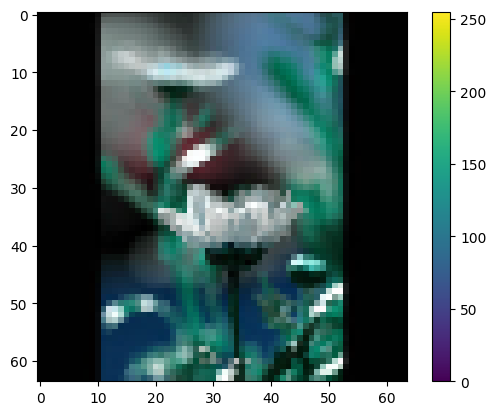

daisy
(64, 64, 3)


In [ ]:
visualize_example(X[70]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_CHARACTERS[y[70]]) # Acceso al diccionario
print(X[70].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

# Preparación de datos

Preparamos los datos, para ello vamos primero a normalizar las imágenes y a convertir nuestra y_train de categórico a numérico entre 0 y 1.

In [ ]:
# normalizar imagenes entre 0 y 1, además de pasar a categorical las labels de manera que al modelo
# le será más fácil reconocer la label que corresponde a la imagen.
from keras.utils import to_categorical

X, X_t = X / 255.0, X_t / 255.0
y = to_categorical(y) # éste método convierte las strings a números

# Separación de datos

He planteado hacer una separación 80-20, siendo el 80% de los datos para entrenar el modelo y el 20% para evaluar el modelo durante el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X , y, test_size=0.2, random_state=2)

# Creación del modelo

Primero declaro la variable del shape de las imágenes para indicar el input del modelo neuronal y luego añado 3 capas convolucionales, 3 maxPooling2d, 4 batch normalization, 1 dropout para evitar el sobreajuste y por último 2 dense para predecir las salidas de cada imagen a predecir o entrenar.

In [ ]:
shape=(IMG_SIZE,IMG_SIZE,3) #(64,64,3)

# creación del modelo convolucional
import tensorflow
from keras import models, layers
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.layers import  BatchNormalization
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=shape,activation="relu")) # capa convolucional
model.add(layers.MaxPooling2D(2,2)) # reduce las dimensiones de la image width y height y coge el valor máximo
BatchNormalization() # normaliza la entrada y aplica una transformación para que la media esté cerca del 0  y la stdv cerca del 1
model.add(layers.Conv2D(64, (3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
BatchNormalization()
model.add(layers.Conv2D(128, (3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
BatchNormalization()
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
BatchNormalization()
model.add(layers.Dense(5, activation="softmax"))

In [ ]:
#resumen de los parámetros del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
#compilador del modelo 
model.compile(optimizer = 'adam', # optimizador uso adam debido a que es bastante preciso en los problemas de clasificación cómo éste
             loss = 'categorical_crossentropy', # la clase de pérdida uso categorical_crossentropy ya que es el más adecuado 
              #usando el optimizador adams y siendo un problema de clasificación
             metrics = ['accuracy']) # y la métrica que uso principalmente es accuracy, sin embargo también puedes usar Recall()

# Entrenamiento del modelo

Usando data augmentation sobre las imágenes procedemos a entrenar el modelo, con un batch size de 80 y 20 épocas.

In [ ]:
# creación de data augmentation con los parámetros
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X) # entrenamiento del data augmentation

In [ ]:
# entrenamiento del modelo usando data augmentation
train_log = model.fit(datagen.flow(x_train, y_train, batch_size=80 ),
          epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
28/28 [==============================] - 22s 755ms/step - loss: 1.4247 - accuracy: 0.3675 - val_loss: 1.2296 - val_accuracy: 0.4400
Epoch 2/20
28/28 [==============================] - 20s 692ms/step - loss: 1.2242 - accuracy: 0.4636 - val_loss: 1.2101 - val_accuracy: 0.4509
Epoch 3/20
28/28 [==============================] - 19s 693ms/step - loss: 1.1605 - accuracy: 0.5091 - val_loss: 1.1493 - val_accuracy: 0.5109
Epoch 4/20
28/28 [==============================] - 21s 730ms/step - loss: 1.1225 - accuracy: 0.5446 - val_loss: 1.1114 - val_accuracy: 0.5127
Epoch 5/20
28/28 [==============================] - 19s 697ms/step - loss: 1.0491 - accuracy: 0.5815 - val_loss: 1.0861 - val_accuracy: 0.5782
Epoch 6/20
28/28 [==============================] - 20s 726ms/step - loss: 0.9979 - accuracy: 0.6093 - val_loss: 1.0402 - val_accuracy: 0.5727
Epoch 7/20
28/28 [==============================] - 20s 678ms/step - loss: 0.9794 - accuracy: 0.6056 - val_loss: 1.1342 - val_accuracy: 0.5745

Hago una predicción.

In [ ]:
y_pred = model.predict(X_t)

29/29 [==============================] - 3s 97ms/step


Genero un reporte de classificación dónde vemos la precisión por cada imagen, el recall y en el apartado support vemos como las imágenes dónde más fallos hay es en las imágenes de girasoles.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
informe = classification_report(np.argmax(y_train[0:len(y_pred)], axis=1), np.argmax(y_pred, axis=1), target_names = list(MAP_CHARACTERS.values()))
print(informe)

              precision    recall  f1-score   support

       daisy       0.21      0.18      0.19       180
   dandelion       0.22      0.13      0.16       228
        rose       0.23      0.30      0.27       164
   sunflower       0.16      0.24      0.19       156
       tulip       0.18      0.17      0.17       196

    accuracy                           0.20       924
   macro avg       0.20      0.20      0.20       924
weighted avg       0.20      0.20      0.19       924



Visualizo una imagen de test y su predicción para ver si todo va bien.

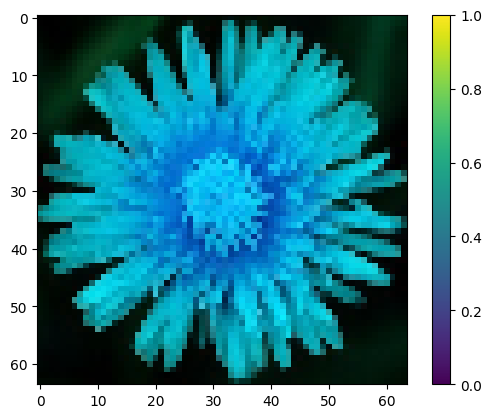

In [ ]:
visualize_example(X_t[2])

In [ ]:
print(MAP_CHARACTERS[np.argmax(y_pred[2])])

sunflower


# Vista del historial

Muestro una pequeña gráfica sobre el historial de la precisión de los datos de training con respecto a los datos de validación y otra igual con la métrica de pérdida.
Se puede apreciar que el modelo no está sobreentrenando ni teniendo un entrenamiento ínfimo por tanto se ha realizado un buen entrenamiento.

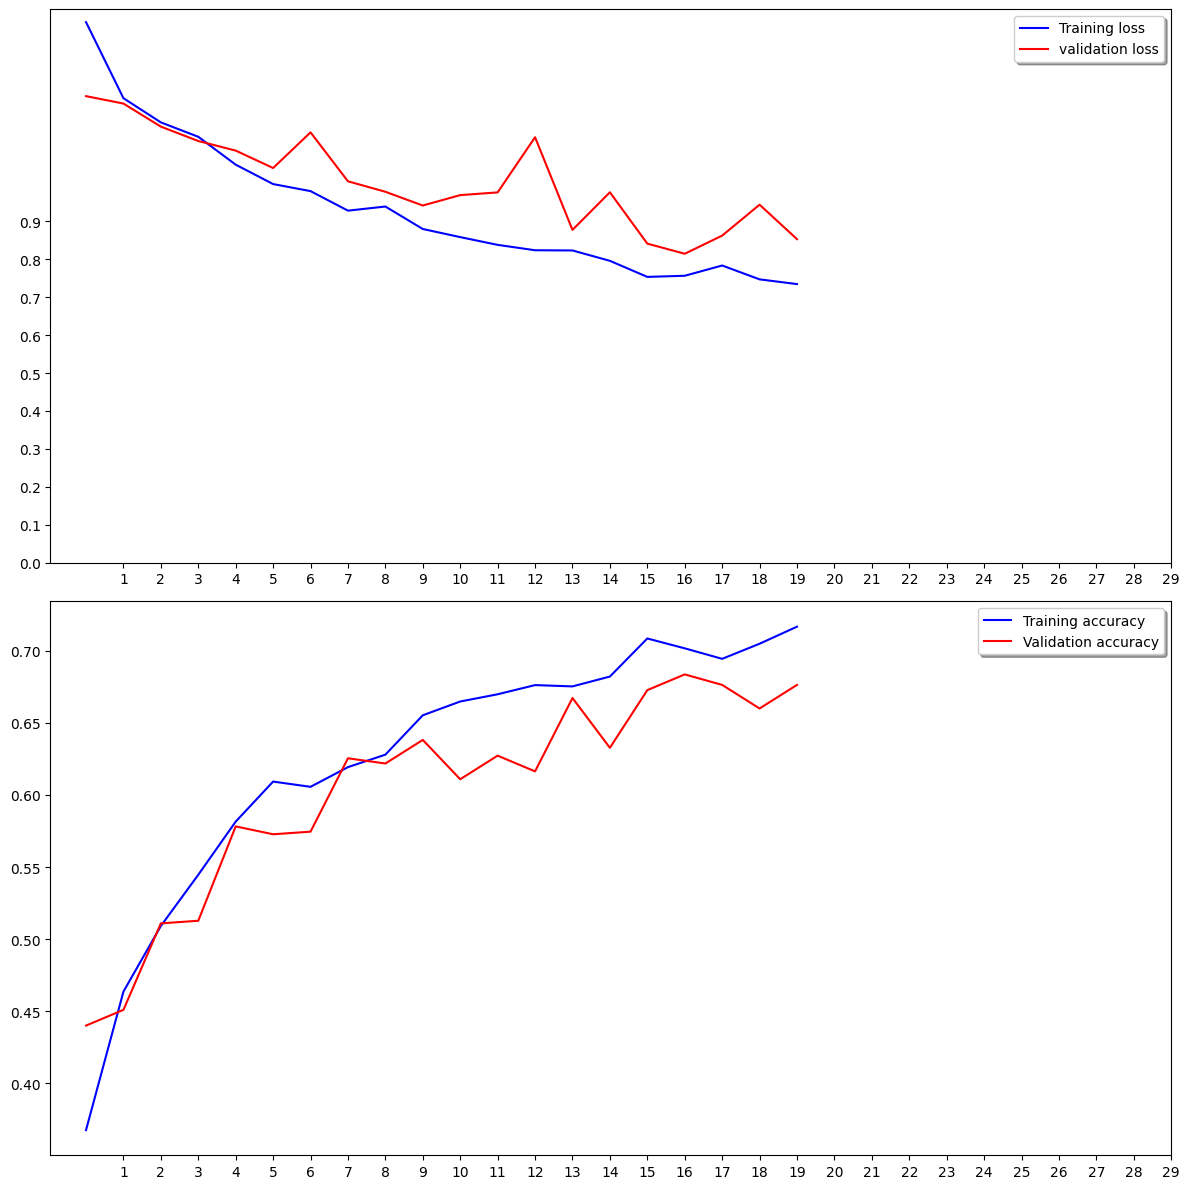

In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(train_log.history['loss'], color='b', label="Training loss")
ax1.plot(train_log.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 30, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(loc='best', shadow=True)
ax2.plot(train_log.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(train_log.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 30, 1))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


## Importar modelo

Guardamos el modelo.

In [ ]:
model.save('flower_model.h5')

Creamos una carpeta de salida dónde se van a generar el json y el bin del modelo.

In [ ]:
!mkdir salida

## Instalar tensorflowjs

Instalamos el la librería tensorflow js para convertirlo a un modelo que se pueda usar para javascript en una web.

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

Finalmente convertimos el modelo y generamos los ficheros en la carpeta salida.

In [ ]:
!tensorflowjs_converter --input_format keras flower_model.h5 salida

2023-05-09 19:54:49.399246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Imagen del código de la web

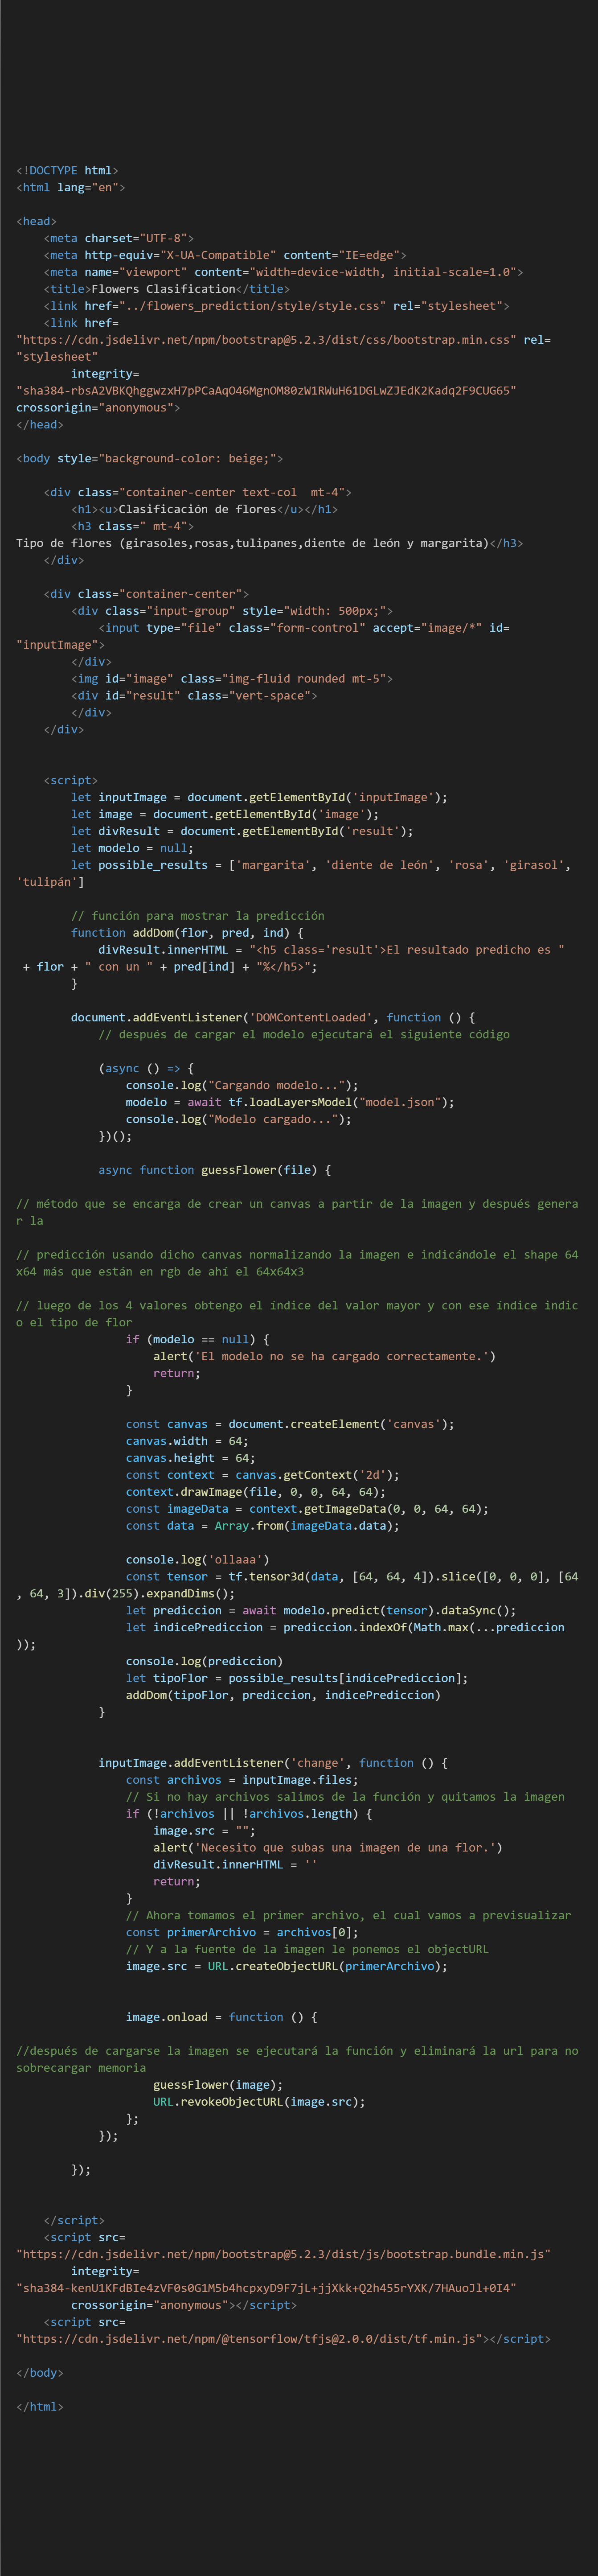


# Imagen de la web

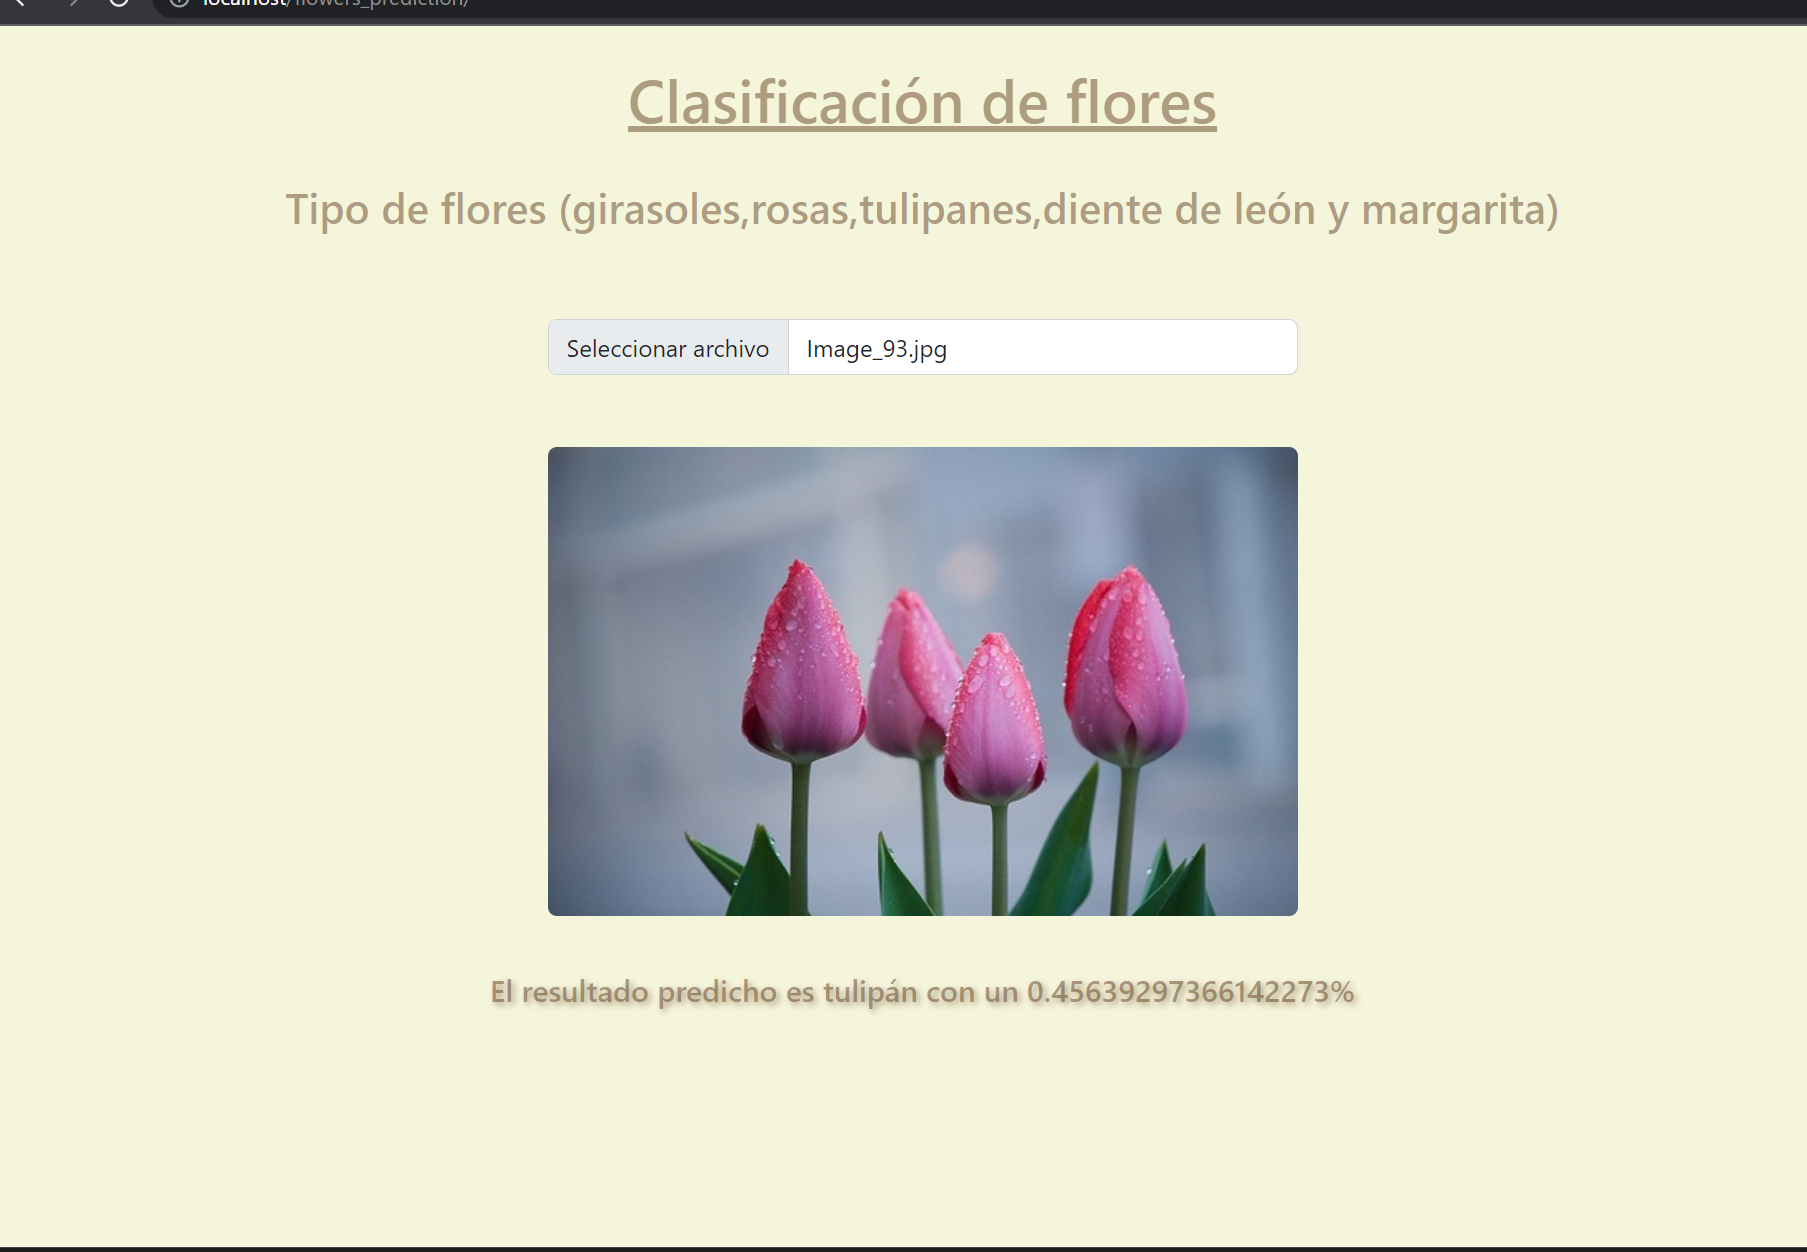
